In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure
from skimage.color import rgb2gray
from skimage.filters import threshold_yen
import glob, os
import cv2

ModuleNotFoundError: No module named 'cv2'

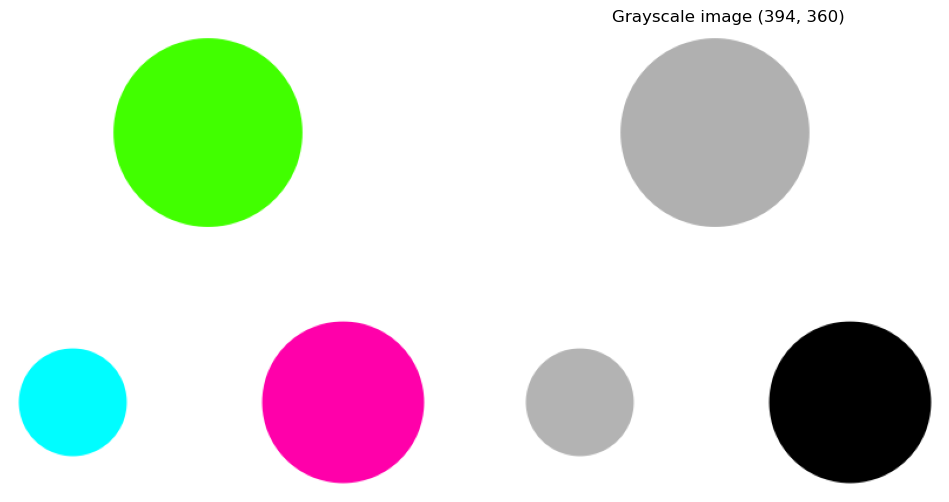

In [17]:
img_original = io.imread('three-circles.png')
img_grey = rgb2gray(img_original)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_original)
ax1.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_grey, cmap='grey')
ax2.set_title(f'Grayscale image {img_grey.shape}')
ax2.axis('off')

plt.show()

(394, 360)
0.9956673828125001 float64
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.80252824
 0.76956667 0.76956667 0.76956667 0.76956667 0.76956667 0.76956667
 0

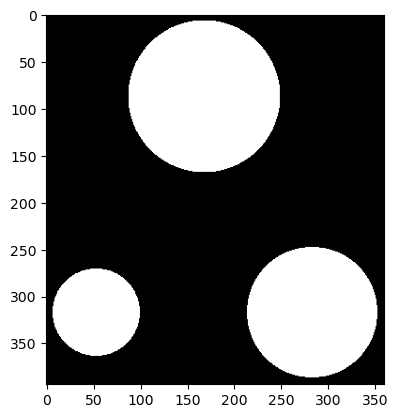

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [37]:
thresholded = rgb2gray(img_original)
print(thresholded.shape)
a = threshold_yen(thresholded)
print(a,a.dtype)

print(thresholded[100])

img_binarised = thresholded < a
plt.imshow(img_binarised, cmap = 'gray')
plt.show()

print(img_binarised[100], img_binarised.shape, sep = '\n')
# plt.imshow(thresholded)

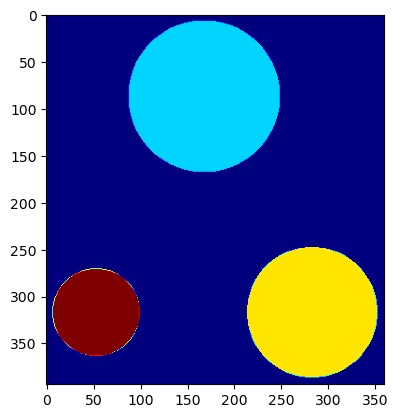

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [45]:
img_labelled = measure.label(img_binarised.astype('uint8'))
plt.imshow(img_labelled, cmap = 'jet')
plt.show()

print(img_labelled[100])
print(img_labelled[300])

In [46]:
# measure.label() requires an image of type int
img_labelled = measure.label(img_binarised.astype('uint8'))
region_info = measure.regionprops(img_labelled)

no_of_regions = len(region_info)

for count, region in enumerate(region_info):
    print('-'*10, f'Region {count}', '-'*10)
    print(f'Centre\t: {region.centroid}')
    print(f'Area\t: {region.area}')             # What is the area
    print('\n')

---------- Region 0 ----------
Centre	: (87.0, 168.0)
Area	: 20565.0


---------- Region 1 ----------
Centre	: (317.0, 283.0)
Area	: 15193.0


---------- Region 2 ----------
Centre	: (317.0, 53.0)
Area	: 6793.0




In [3]:
path_to_images = glob.glob(os.path.join('Challenge01_Images', '*.jpg'))

In [5]:
%%timeit
img_ori = plt.imread(path_to_images[-1])
img_new = img_ori.copy()
img_new = img_new.astype(np.float64)

# plt.imshow(img_new, cmap='gray')
# plt.axis('off')
# plt.show()

for layer in img_new:
    mask = layer > 50
    mask = mask.astype(np.float64)
    mask[mask == 1] = 1.5
    mask[mask == 0] = 1
    layer*=mask

3.49 ms ± 91.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
img_ori = plt.imread(path_to_images[-1])
img_new = img_ori.copy()

for i in img_new:
    for j in i:
        if j > 50:
            j*=1.5


229 ms ± 8.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
229/3.29

69.6048632218845

In [9]:
%%timeit
img_ori = plt.imread(path_to_images[-1])
img_new = img_ori.copy()
img_new = img_new.astype(np.float64)
mask = img_new > 50
img_new[mask]*=1.5

948 μs ± 3.09 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
